In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf


In [5]:
tf.__version__

'1.15.0'

In [0]:
df = pd.read_csv('/content/cancer_classification.csv')

In [7]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

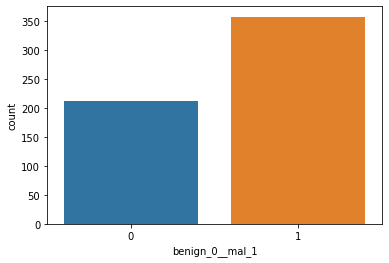

In [10]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [11]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [12]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

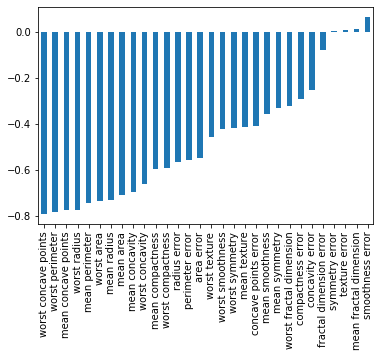

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

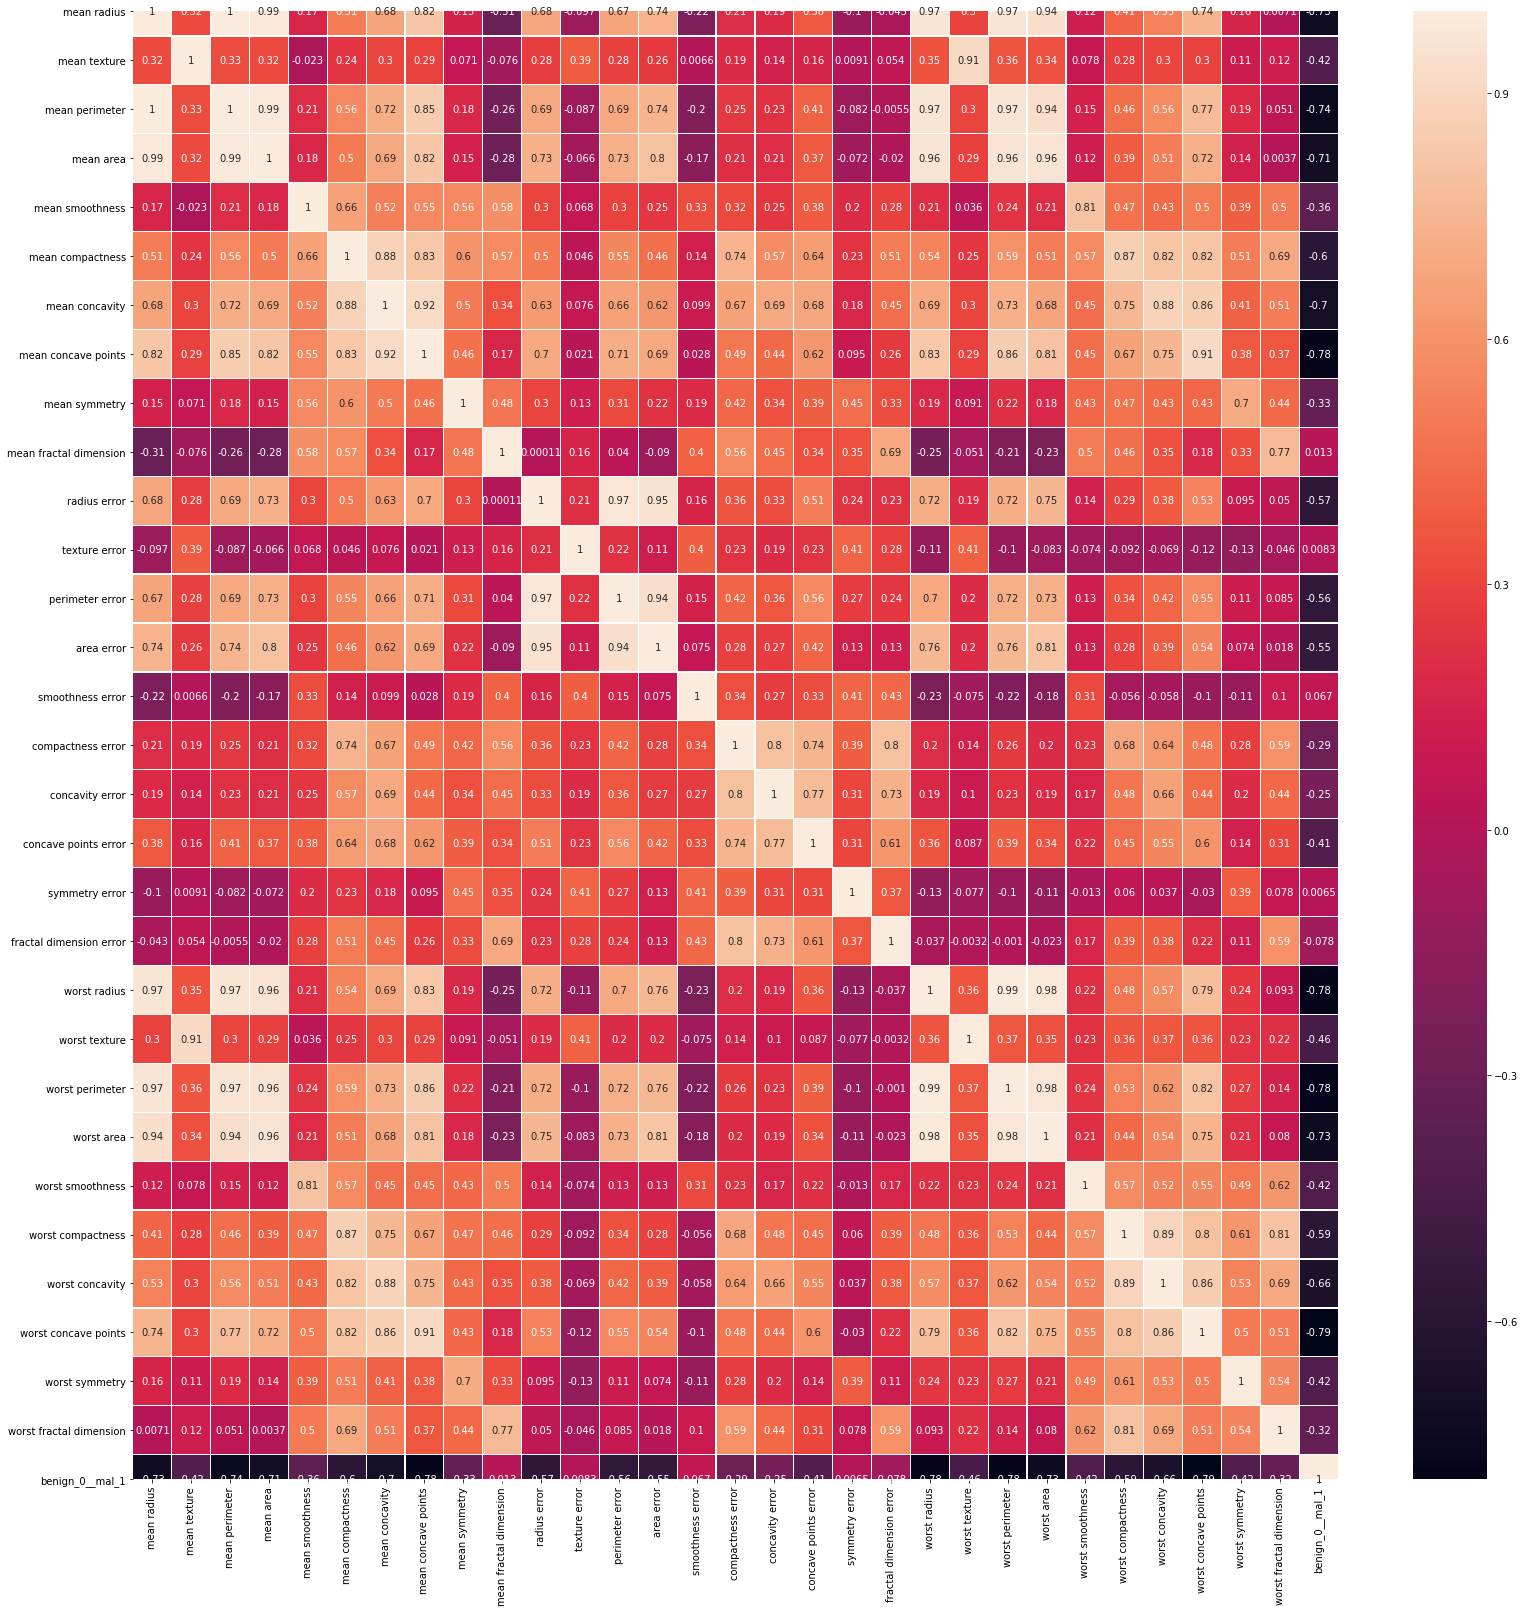

In [14]:
plt.figure(figsize=(27,27))
sns.heatmap(df.corr(), annot= True, linewidths=.2)

In [0]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [22]:
model.fit(x=X_train, y=y_train, epochs=580, validation_data=(X_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/580
426/426 [==============================] - 1s 2ms/sample - loss: 0.6868 - val_loss: 0.6806
Epoch 2/580
426/426 [==============================] - 0s 80us/sample - loss: 0.6617 - val_loss: 0.6545
Epoch 3/580
426/426 [==============================] - 0s 65us/sample - loss: 0.6371 - val_loss: 0.6283
Epoch 4/580
426/426 [==============================] - 0s 66us/sample - loss: 0.6114 - val_loss: 0.6023
Epoch 5/580
426/426 [==============================] - 0s 78us/sample - loss: 0.5864 - val_loss: 0.5761
Epoch 6/580
426/426 [==============================] - 0s 89us/sample - loss: 0.5601 - val_loss: 0.5491
Epoch 7/580
426/426 [==============================] - 0s 75us/sample - loss: 0.5325 - val_loss: 0.5205
Epoch 8/580
426/426 [==============================]

In [0]:
losses = pd.DataFrame(model.history.history)

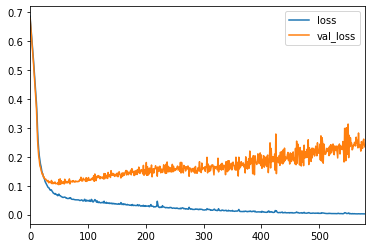

In [24]:
losses.plot()

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [0]:
early_stoppage = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, y=y_train, epochs=580, validation_data=(X_test, y_test),
          callbacks=[early_stoppage])

Train on 426 samples, validate on 143 samples
Epoch 1/580
426/426 [==============================] - 0s 451us/sample - loss: 0.6739 - val_loss: 0.6501
Epoch 2/580
426/426 [==============================] - 0s 73us/sample - loss: 0.6301 - val_loss: 0.6140
Epoch 3/580
426/426 [==============================] - 0s 69us/sample - loss: 0.5927 - val_loss: 0.5766
Epoch 4/580
426/426 [==============================] - 0s 65us/sample - loss: 0.5527 - val_loss: 0.5360
Epoch 5/580
426/426 [==============================] - 0s 64us/sample - loss: 0.5115 - val_loss: 0.4926
Epoch 6/580
426/426 [==============================] - 0s 70us/sample - loss: 0.4686 - val_loss: 0.4476
Epoch 7/580
426/426 [==============================] - 0s 68us/sample - loss: 0.4271 - val_loss: 0.4051
Epoch 8/580
426/426 [==============================] - 0s 70us/sample - loss: 0.3881 - val_loss: 0.3649
Epoch 9/580
426/426 [==============================] - 0s 67us/sample - loss: 0.3500 - val_loss: 0.3319
Epoch 10/580
426/

In [0]:
model_loss = pd.DataFrame(model.history.history)

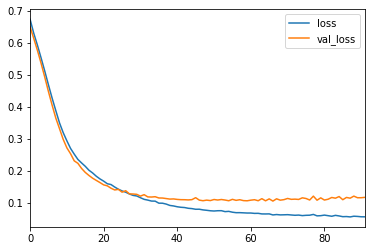

In [29]:
model_loss.plot()

## Adding dropout layers

In [0]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, y=y_train, epochs=580, validation_data=(X_test, y_test),
          callbacks=[early_stoppage])

Train on 426 samples, validate on 143 samples
Epoch 1/580
426/426 [==============================] - 0s 969us/sample - loss: 0.6582 - val_loss: 0.6574
Epoch 2/580
426/426 [==============================] - 0s 86us/sample - loss: 0.6620 - val_loss: 0.6399
Epoch 3/580
426/426 [==============================] - 0s 93us/sample - loss: 0.6575 - val_loss: 0.6226
Epoch 4/580
426/426 [==============================] - 0s 99us/sample - loss: 0.6372 - val_loss: 0.6092
Epoch 5/580
426/426 [==============================] - 0s 98us/sample - loss: 0.6427 - val_loss: 0.5938
Epoch 6/580
426/426 [==============================] - 0s 90us/sample - loss: 0.5978 - val_loss: 0.5751
Epoch 7/580
426/426 [==============================] - 0s 83us/sample - loss: 0.5834 - val_loss: 0.5475
Epoch 8/580
426/426 [==============================] - 0s 78us/sample - loss: 0.5644 - val_loss: 0.5223
Epoch 9/580
426/426 [==============================] - 0s 95us/sample - loss: 0.5567 - val_loss: 0.4958
Epoch 10/580
426/

In [0]:
model_loss = pd.DataFrame(model.history.history)

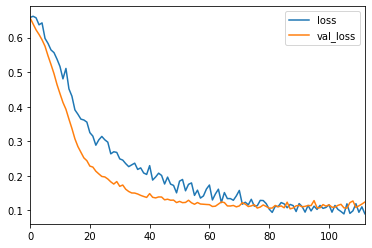

In [33]:
model_loss.plot()

In [0]:
predictions = model.predict_classes(X_test)

In [35]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]


In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

